In [12]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Number of records to simulate
num_customers = 5000

# 1. Customer ID (simulated as a unique identifier)
customer_id = np.arange(1, num_customers + 1)

# 2. Simulating Join Dates (up to 5 years ago)
# We assume customers joined between 1 day and 5 years ago
end_date = datetime(2024, 11, 19)  # Today's date
start_date = end_date - timedelta(days=5*365)  # 5 years ago

# Generate random join dates between start_date and end_date
join_dates = pd.to_datetime(np.random.choice(pd.date_range(start=start_date, end=end_date), size=num_customers))

# 3. Calculate Account Age in Days (difference between today's date and join date)
account_age_days = (end_date - join_dates).days

# 4. Subscription Plan (1: Basic, 2: Standard, 3: Premium)
subscription_plan = np.random.choice([1, 2, 3], size=num_customers, p=[0.3, 0.5, 0.2])

# 5. Monthly Fee (Basic: $8.99, Standard: $13.99, Premium: $17.99)
monthly_fee = np.select(
    [subscription_plan == 1, subscription_plan == 2, subscription_plan == 3],
    [8.99, 13.99, 17.99]
)

# 6. Number of Devices (most customers use between 1 and 5 devices)
num_devices = np.random.choice([1, 2, 3, 4, 5], size=num_customers, p=[0.2, 0.3, 0.3, 0.15, 0.05])

# 7. Average Watch Time (hours per week, typically 1 to 40 hours)
avg_watch_time = np.clip(np.random.normal(loc=15, scale=10, size=num_customers), 1, 40)

# 8. Customer Satisfaction (scale 1-10, where 1 is very dissatisfied and 10 is very satisfied)
customer_satisfaction = np.random.randint(1, 11, size=num_customers)

# 9. Payment Method (1: Credit Card, 2: PayPal, 3: Other)
payment_method = np.random.choice([1, 2, 3], size=num_customers, p=[0.6, 0.3, 0.1])

# 10. Has Discount (0: No, 1: Yes, assume 20% of customers have discounts)
has_discount = np.random.choice([0, 1], size=num_customers, p=[0.8, 0.2])

# 11. Churn Status (0: Not churned, 1: Churned)
# Churn probability is higher for dissatisfied customers, shorter account age, and lower watch time.
churn_probability = (
    0.4 * (1 - customer_satisfaction / 10) +   # Dissatisfaction increases churn
    0.3 * (1 / account_age_days) +             # Shorter account age increases churn
    0.3 * (1 / (avg_watch_time + 1))           # Lower watch time increases churn
)
churn_probability = np.clip(churn_probability, 0, 1)

churn_status = np.random.binomial(1, churn_probability)

# Create the DataFrame
customer_data = pd.DataFrame({
    'Customer_ID': customer_id,
    'Join_Date': join_dates,
    'Account_Age_Days': account_age_days,
    'Subscription_Plan': subscription_plan,
    'Monthly_Fee': monthly_fee,
    'Num_Devices': num_devices,
    'Avg_Watch_Time_per_Week': avg_watch_time,
    'Customer_Satisfaction': customer_satisfaction,
    'Payment_Method': payment_method,
    'Has_Discount': has_discount,
    'Churn_Status': churn_status  # Adding the Churn Status back into the dataset
})

# Display the first few rows of the simulated data
print(customer_data.head())

# Optionally, save the simulated data to CSV
# customer_data.to_csv('simulated_netflix_customer_data_with_churn.csv', index=False)

   Customer_ID  Join_Date  Account_Age_Days  Subscription_Plan  Monthly_Fee  \
0            1 2022-12-21               699                  2        13.99   
1            2 2023-11-19               366                  3        17.99   
2            3 2022-03-30               965                  2        13.99   
3            4 2023-06-07               531                  3        17.99   
4            5 2022-12-25               695                  2        13.99   

   Num_Devices  Avg_Watch_Time_per_Week  Customer_Satisfaction  \
0            2                14.690546                      3   
1            3                16.205390                      2   
2            3                11.212588                      5   
3            3                 1.785451                      2   
4            1                 2.080054                     10   

   Payment_Method  Has_Discount  Churn_Status  
0               1             0             0  
1               2             1 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the data
print(customer_data.head())

   Customer_ID  Join_Date  Account_Age_Days  Subscription_Plan  Monthly_Fee  \
0            1 2022-12-21               699                  2        13.99   
1            2 2023-11-19               366                  3        17.99   
2            3 2022-03-30               965                  2        13.99   
3            4 2023-06-07               531                  3        17.99   
4            5 2022-12-25               695                  2        13.99   

   Num_Devices  Avg_Watch_Time_per_Week  Customer_Satisfaction  \
0            2                14.690546                      3   
1            3                16.205390                      2   
2            3                11.212588                      5   
3            3                 1.785451                      2   
4            1                 2.080054                     10   

   Payment_Method  Has_Discount  Churn_Status  
0               1             0             0  
1               2             1 

In [14]:
# Summary statistics of the dataset
print(customer_data.describe())

# Checking for missing values
print(customer_data.isnull().sum())

       Customer_ID  Account_Age_Days  Subscription_Plan  Monthly_Fee  \
count  5000.000000       5000.000000        5000.000000  5000.000000   
mean   2500.500000        900.687600           1.896800    13.275200   
std    1443.520003        524.098607           0.700177     3.197171   
min       1.000000          0.000000           1.000000     8.990000   
25%    1250.750000        449.750000           1.000000     8.990000   
50%    2500.500000        890.500000           2.000000    13.990000   
75%    3750.250000       1348.250000           2.000000    13.990000   
max    5000.000000       1825.000000           3.000000    17.990000   

       Num_Devices  Avg_Watch_Time_per_Week  Customer_Satisfaction  \
count  5000.000000              5000.000000             5000.00000   
mean      2.545800                15.331452                5.53280   
std       1.112362                 9.245238                2.83396   
min       1.000000                 1.000000                1.00000   
2

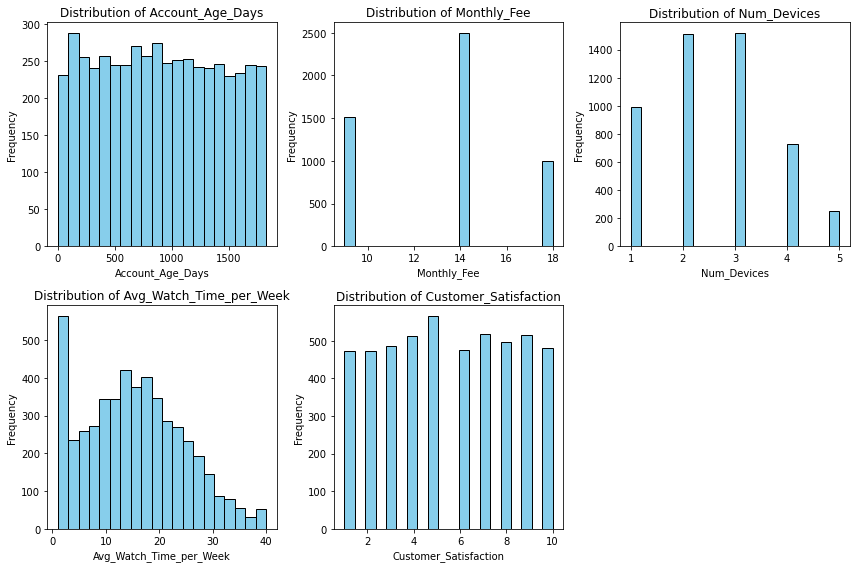

In [15]:
# Set the plot size
plt.figure(figsize=(12, 8))

# List of numerical columns
numeric_cols = ['Account_Age_Days', 'Monthly_Fee', 'Num_Devices', 'Avg_Watch_Time_per_Week', 'Customer_Satisfaction']

# Plotting histograms
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(customer_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Churn Rate: 21.32%


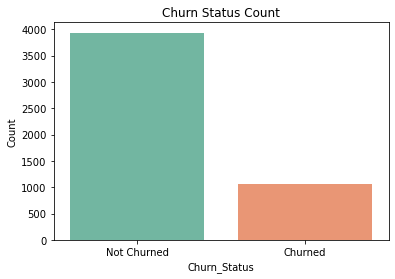

In [16]:
# Churn rate
churn_rate = customer_data['Churn_Status'].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

# Plotting churn status count
plt.figure(figsize=(6,4))
sns.countplot(x='Churn_Status', data=customer_data, palette='Set2')
plt.title('Churn Status Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.ylabel('Count')
plt.show()

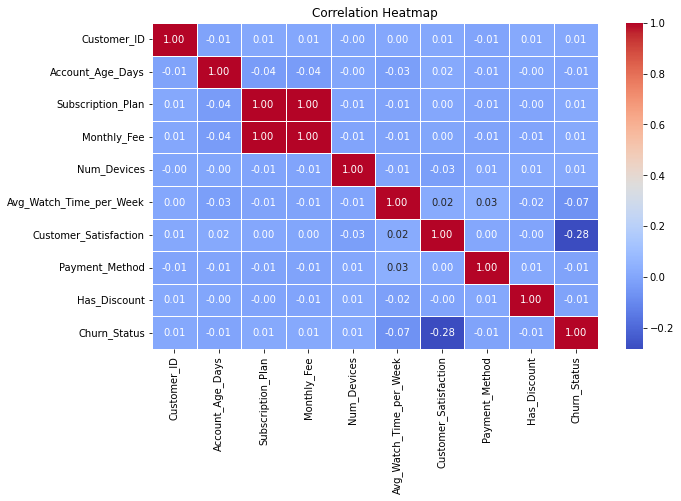

In [17]:
# Correlation matrix
corr_matrix = customer_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

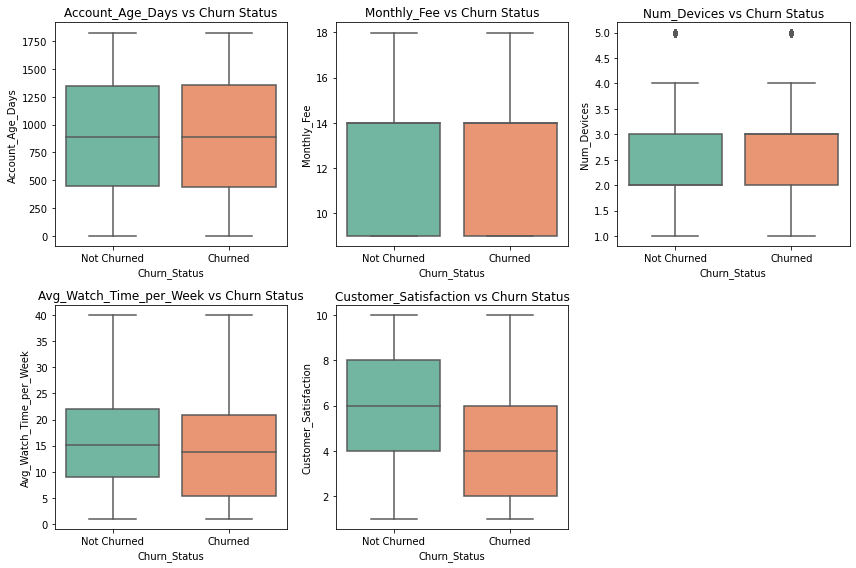

In [18]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Plot boxplots for each numerical variable against churn status
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn_Status', y=col, data=customer_data, palette='Set2')
    plt.title(f'{col} vs Churn Status')
    plt.xticks([0, 1], ['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

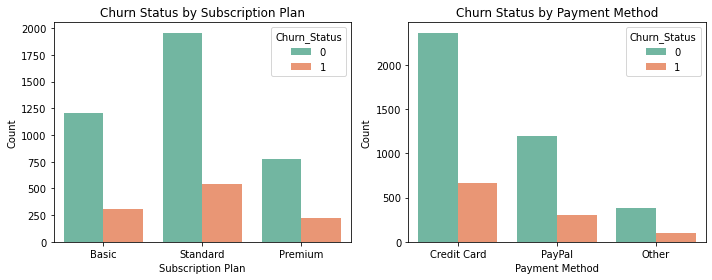

In [19]:
plt.figure(figsize=(10, 4))

# Churn rate by subscription plan
plt.subplot(1, 2, 1)
sns.countplot(x='Subscription_Plan', hue='Churn_Status', data=customer_data, palette='Set2')
plt.title('Churn Status by Subscription Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Basic', 'Standard', 'Premium'])

# Churn rate by payment method
plt.subplot(1, 2, 2)
sns.countplot(x='Payment_Method', hue='Churn_Status', data=customer_data, palette='Set2')
plt.title('Churn Status by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Credit Card', 'PayPal', 'Other'])

plt.tight_layout()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Extract additional features from the Join_Date
customer_data['Join_Year'] = customer_data['Join_Date'].dt.year
customer_data['Join_Month'] = customer_data['Join_Date'].dt.month
customer_data['Join_Day'] = customer_data['Join_Date'].dt.day
customer_data['Join_Weekday'] = customer_data['Join_Date'].dt.weekday

# Drop the original Join_Date as it is no longer needed
customer_data = customer_data.drop('Join_Date', axis=1)

# Define features and target
features = customer_data.drop('Churn_Status', axis=1)
target = customer_data['Churn_Status']

# Identify categorical and numerical features
categorical_features = ['Subscription_Plan', 'Payment_Method', 'Has_Discount', 'Join_Year', 'Join_Month', 'Join_Day', 'Join_Weekday']
numerical_features = ['Account_Age_Days', 'Monthly_Fee', 'Num_Devices', 'Avg_Watch_Time_per_Week', 'Customer_Satisfaction']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Create a pipeline without class weights
pipeline_no_weights = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model without class weights
pipeline_no_weights.fit(X_train, y_train)

# Predict without class weights
y_pred_no_weights = pipeline_no_weights.predict(X_test)

# Evaluate the model without class weights
print("Without Class Weights")
print("Accuracy:", accuracy_score(y_test, y_pred_no_weights))
print(classification_report(y_test, y_pred_no_weights))

# Create a pipeline with class weights
pipeline_with_weights = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Fit the model with class weights
pipeline_with_weights.fit(X_train, y_train)

# Predict with class weights
y_pred_with_weights = pipeline_with_weights.predict(X_test)

# Evaluate the model with class weights
print("\nWith Class Weights")
print("Accuracy:", accuracy_score(y_test, y_pred_with_weights))
print(classification_report(y_test, y_pred_with_weights))

Without Class Weights
Accuracy: 0.784
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       787
           1       0.44      0.05      0.09       213

    accuracy                           0.78      1000
   macro avg       0.62      0.52      0.48      1000
weighted avg       0.72      0.78      0.71      1000


With Class Weights
Accuracy: 0.779
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       787
           1       0.33      0.04      0.07       213

    accuracy                           0.78      1000
   macro avg       0.56      0.51      0.47      1000
weighted avg       0.69      0.78      0.70      1000

